In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import files

In [3]:
file_path = "/kaggle/input/mental-health-and-burnout-in-the-workplace/mental_health_workplace_survey.csv"
df = pd.read_csv(file_path)

In [7]:
X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=69)


In [9]:
cat_cols = X_train.select_dtypes(include="object").columns
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoder.fit(X_train[cat_cols])

X_train_cat = pd.DataFrame(encoder.transform(X_train[cat_cols]),
                           columns=encoder.get_feature_names_out(cat_cols),
                           index=X_train.index)

X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols),
                          index=X_test.index)

In [10]:
# Handling numerical columns
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

# Combine encoded and numeric features
X_train_final = pd.concat([X_train_cat, X_train_num], axis=1)
X_test_final = pd.concat([X_test_cat, X_test_num], axis=1)

In [11]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_final),
                              columns=X_train_final.columns, index=X_train_final.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_final),
                             columns=X_test_final.columns, index=X_test_final.index)

In [13]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Feature importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)
top_3_features = feat_imp.sort_values(ascending=False).head(3).index.tolist()

print("Top 3 features:", top_3_features)



Top 3 features: ['BurnoutLevel', 'StressLevel', 'CareerGrowthScore']


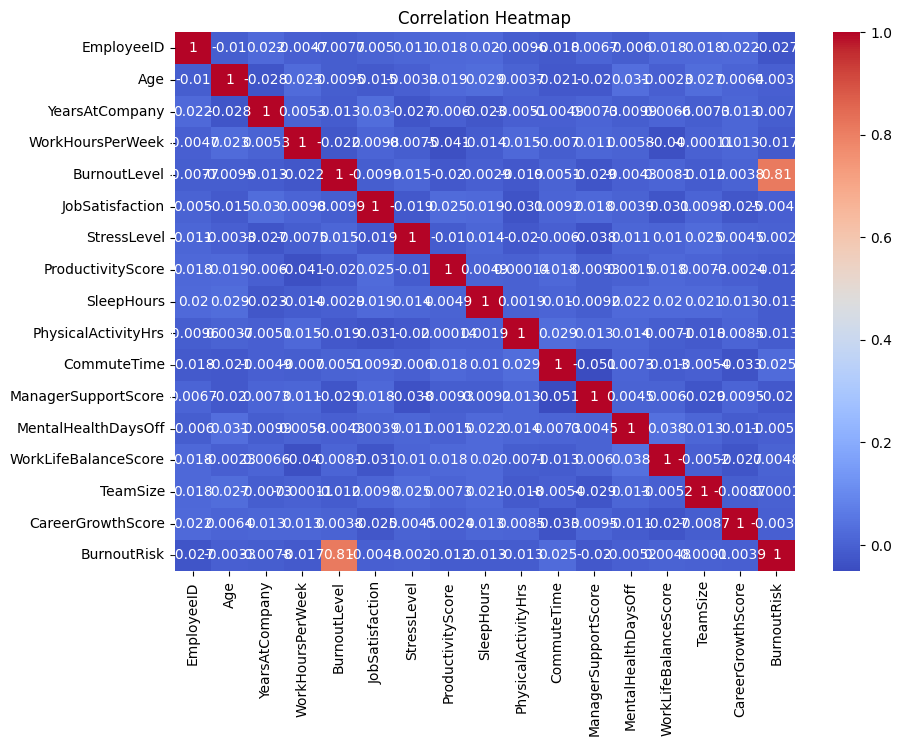

In [16]:
# Heatmap 
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Minimal model using only top 3 features
X_train_min = X_train_scaled[top_3_features]
X_test_min = X_test_scaled[top_3_features]

rf_minimal = RandomForestClassifier(random_state=42)
rf_minimal.fit(X_train_min, y_train)
y_pred_min = rf_minimal.predict(X_test_min)

# Evaluation
acc = accuracy_score(y_test, y_pred_min)
conf = confusion_matrix(y_test, y_pred_min)

print(f"Minimal Model Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", conf)



Minimal Model Accuracy: 1.00
Confusion Matrix:
 [[408   0]
 [  1 191]]


JUSTIFICATION FOR SELECTION:

 BurnoutLevel was chosen due to its significant feature importance.  
 StressLevel was included because of its strong relevance based on feature importance.  
 CareerGrowthScore was identified as important based on its high feature importance ranking.